In [1]:
#Importando as bibliotecas
import cv2
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
#%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w9 - Video Analysis\data"

In [2]:
tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'CSRT', 'MOSSE']

In [3]:
tracker_type = tracker_types[6]

In [4]:
if tracker_type == 'MOSSE':
    tracker = cv2.TrackerMOSSE_create()
elif tracker_type == 'CSRT':
    tracker = cv2.TrackerCSRT_create()
elif tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif tracker_type == 'TLD':
    tracker = cv2.TrackerTLD_create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.TrackerMedianFlow_create()
else:
    tracker = None
    print('Incorrect tracker name')
    print('Available trackers are:')
    for t in tracker_types:
        print(t)

## Step 1: Ler Vídeo

In [5]:
video = cv2.VideoCapture(DATA_PATH + "/videos/video_out.mp4")

In [6]:
# Exit if video not opened.
if not video.isOpened():
    print("Could not open video")

# Read first frame.
ok, frame = video.read()
if not ok:
    print('Cannot read video file')

# Define a few colors for drawing
red = (0,0,255)
blue = (255,128,0)

## Step 2: Define inital bounding box

In [7]:
# Define an initial bounding box
# Cycle
bboxCycle = (477, 254, 55, 152)

# ship
bboxship = (751, 146, 51, 78)

# Hockey
bboxHockey = (129, 47, 74, 85)

# Face2
bboxFace2 = (237, 145, 74, 88)

# meeting
bboxMeetingCSRT = (627, 183, 208, 190)     #CSRT
bboxMeetingKCF = (652, 187, 118, 123)       #KCF

# surfing
bboxSurfing = (97, 329, 118, 293)

# surf
bboxSurf = (548, 587, 52, 87)

# spinning
bboxSpinningRED = (232, 218, 377, 377)       #RED
bboxSpinningBLUE = (699, 208, 383, 391)         #BLUE

# Car
bboxCar = (71, 457, 254, 188)

Text(0.5, 1.0, 'Tracking')

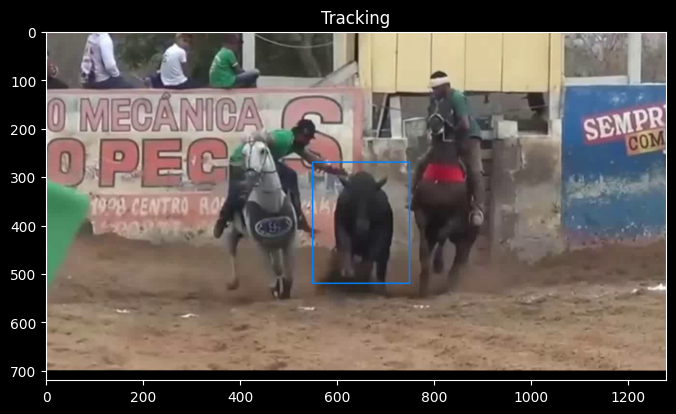

In [8]:
video = cv2.VideoCapture(DATA_PATH + "/videos/video_out.mp4")
ok, frame = video.read()
# Uncomment the line below to select a different bounding box
# bbox = cv2.selectROI(frame, False)
bbox = (550, 270,200, 250)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

# Display bounding box.
p1 = (int(bbox[0]), int(bbox[1]))
p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
cv2.rectangle(frame, p1, p2, blue, 2, 1 )

plt.imshow(frame[:,:,::-1])
plt.title("Tracking")

## Step 3: Execute in Video

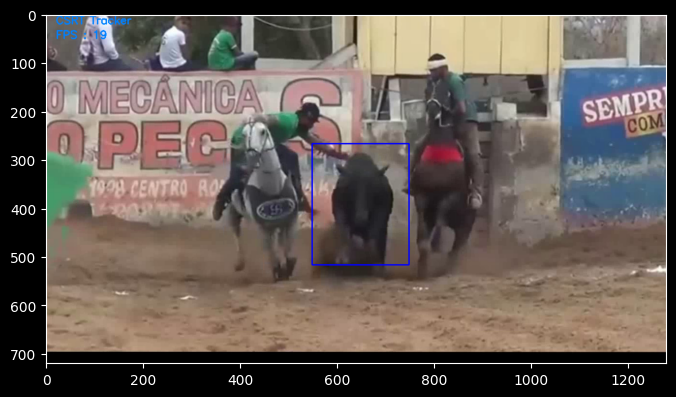

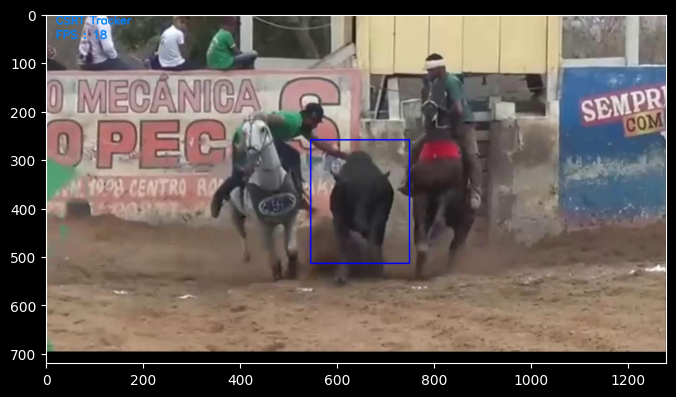

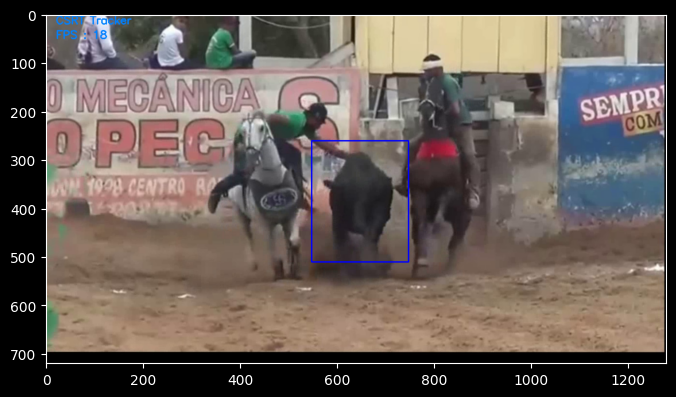

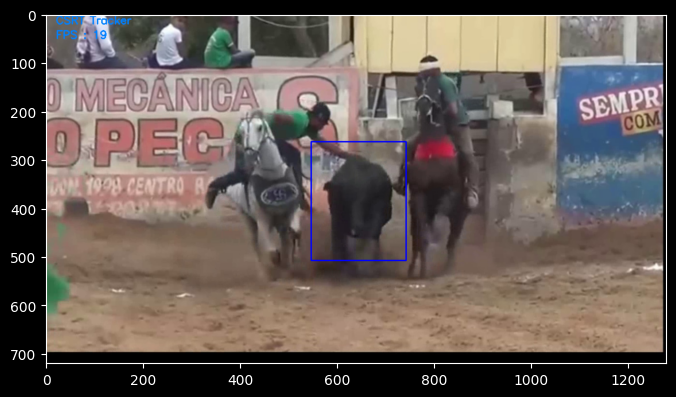

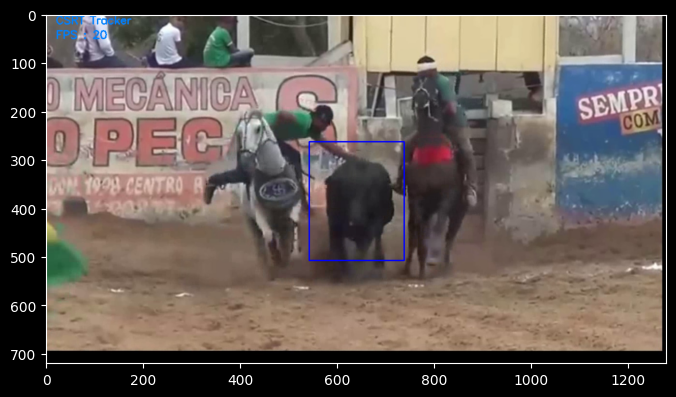

In [9]:
# We will display only first 5 frames
count = 0

while True:
    # Read a new frame
    ok, frame = video.read()
    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ret, bbox = tracker.update(frame)

    # Calculate processing time and display results.
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

    # Draw bounding box
    if ok:
        # Tracking success
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    else :
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (20,80),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75,red,2)

    # Display tracker type on frame
    cv2.putText(frame, tracker_type + " Tracker", (20,20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, blue,2);

    # Display FPS on frame
    cv2.putText(frame, "FPS : " + str(int(fps)), (20,50),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, blue, 2);

    # Display result
    plt.imshow(frame[:,:,::-1])
    plt.show()

    count += 1
    if count == 5:
        break

In [10]:
# Definir as configurações do vídeo de saída
output_file = 'output_video.mp4'
output_fps = 30.0  # Taxa de frames por segundo do vídeo de saída
output_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
output_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_file, fourcc, output_fps, (int(output_width), int(output_height)))

while True:
    # Ler um novo frame
    ok, frame = video.read()
    if not ok:
        break

    # Iniciar o cronômetro
    timer = cv2.getTickCount()

    # Atualizar o rastreador
    ret, bbox = tracker.update(frame)

    # Calcular o tempo de processamento e exibir os resultados.
    # Calcular os Frames por segundo (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Desenhar a caixa delimitadora
    if ok:
        # Rastreamento bem-sucedido
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
    else:
        # Falha no rastreamento
        cv2.putText(frame, "Falha na detecção do rastreamento", (20, 80),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

    # Exibir o tipo de rastreador no frame
    cv2.putText(frame, tracker_type + " Tracker", (20, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

    # Exibir o FPS no frame
    cv2.putText(frame, "FPS: " + str(int(fps)), (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

    # Exibir o resultado
    cv2.imshow("Imagem", frame)

    # Salvar o frame no vídeo de saída
    output_video.write(frame)

    # Verificar se a tecla 'q' foi pressionada
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
video.release()
output_video.release()
cv2.destroyAllWindows()


http://www.vision.ee.ethz.ch/boostingTrackers/Grabner2006RealTimeTracking.pdf

http://vision.ucsd.edu/~bbabenko/new/project_miltrack.shtml

https://arxiv.org/abs/1404.7584

http://kahlan.eps.surrey.ac.uk/featurespace/tld/Publications/2011_tpami

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.231.4285&rep=rep1&type=pdf

http://davheld.github.io/GOTURN/GOTURN.pdf

http://docs.opencv.org/trunk/d0/d0a/classcv_1_1Tracker.html